# Sales Analysis

## Data Wrangling

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
#Read given CSV file
df = pd.read_csv('AusApparalSales4thqrt2020.csv', parse_dates=['Date'], dtype={'Time': str, 'State': str, 'Group': str})

C:\Users\aman7\AppData\Local\Temp\ipykernel_18952\2929190664.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('AusApparalSales4thqrt2020.csv', parse_dates=['Date'], dtype={'Time': str, 'State': str, 'Group': str})


In [4]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


Now Inspect data manually for missing or incorrect data using the func isna() and notna()

In [5]:
#isna() function is used for detect missing value in the given dataframe
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [6]:
#notna() function indicates whether an element is not an NA value
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

So,There is no missing or NA value in the given dataframe

#### Data Normalization
For performing the data normalization, we need to separate the numeric and non numeric data. 
We will create a new dataframe called df_dataonly from the existing df object.

In [7]:
df_dataonly = df[['Unit','Sales']]

In [8]:
df_dataonly

,Unit,Sales
0,8,20000
1,8,20000
2,4,10000
3,15,37500
4,3,7500
...,...,...
7555,14,35000
7556,15,37500
7557,15,37500
7558,11,27500


In [9]:
#Now, from the MinMaxScalar object, create a normalize object
normalize = MinMaxScaler()

In [10]:
normalize_data = normalize.fit_transform(df_dataonly)

In [11]:
#normalize_data[:, [0]] will list all the values of normailzed Unit values.
normalize_data[:, [0]]

array([[0.0952381 ],
       [0.0952381 ],
       [0.03174603],
       ...,
       [0.20634921],
       [0.14285714],
       [0.17460317]])

In [12]:
#normalize_data[:, [1]] will list all the values of normalized Sales values.
normalize_data[:,[1]]

array([[0.0952381 ],
       [0.0952381 ],
       [0.03174603],
       ...,
       [0.20634921],
       [0.14285714],
       [0.17460317]])

Now, check the min and max values of each of the column. 
Min should be 0.0 and max should be 1.0, for *Unit* as well as *Sales* column.

In [13]:
print(normalize_data[:, [0]].min(), normalize_data[:, [0]].max())

0.0 0.9999999999999999


In [14]:
print(normalize_data[:, [1]].min(), normalize_data[:, [1]].max())

0.0 1.0


##### Checked Whole Data set For Null values and didn't found it.
##### Data is clear for Null and outlier, 

## Data Analysis
***Top-level description***

### Monthy , Weekly , Quarterly Reports from the Data set.
**Usage of the groupby() function for data chunking or merging.**

# Quarterly Data Analysis

In [49]:
df_data = df[['Date','Unit']]
#df_data.plot.bar(y='Unit')
df_data.index
sns.barplot(x = df_data.index, y = 'Unit', data=df_data)

<Axes: xlabel='None', ylabel='Unit'>

Error in callback <function _draw_all_if_interactive at 0x0000020BA51E1C60> (for post_execute):


KeyboardInterrupt: 

### Monthly Data Analysis
Now, let's chunk this quarterly data into monthly data and perform the analysis. For each of the month.

In [ ]:
dates = df['Date']
df_unit_and_sales = df.groupby(by='Date').sum(numeric_only = True)
df_unit_and_sales

C:\Users\aman7\AppData\Local\Temp\ipykernel_18952\618362419.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_unit_and_sales = df.groupby(by='Date', axis='index').sum(numeric_only = True)


,Unit,Sales
Date,,
2020-10-01,1488,3720000
2020-10-02,1486,3715000
2020-10-03,1556,3890000
2020-10-04,1488,3720000
2020-10-05,1545,3862500
...,...,...
2020-12-26,1886,4715000
2020-12-27,1855,4637500
2020-12-28,1838,4595000


In [17]:
df_oct = df_unit_and_sales.loc['2020-10-01':'2020-10-30']
df_nov = df_unit_and_sales.loc['2020-11-01':'2020-11-30']
df_dec = df_unit_and_sales.loc['2020-12-01':'2020-12-31']

<Axes: xlabel='Date', ylabel='Unit'>

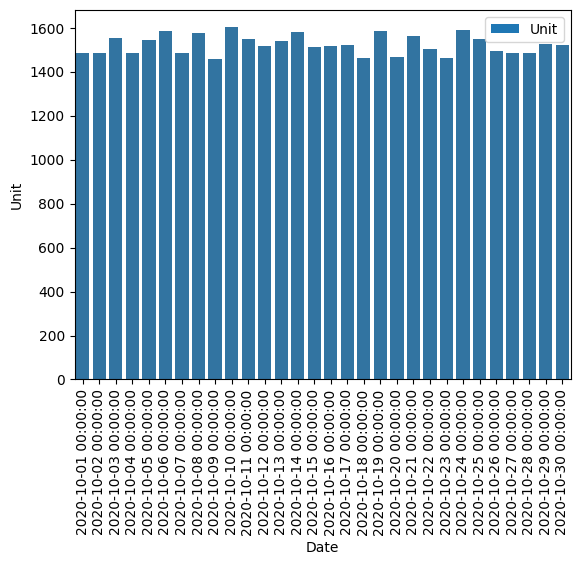

In [18]:
df_oct.plot.bar(y='Unit')
df_oct.index
sns.barplot(x = df_oct.index, y = 'Unit', data=df_oct)

<Axes: xlabel='Date', ylabel='Unit'>

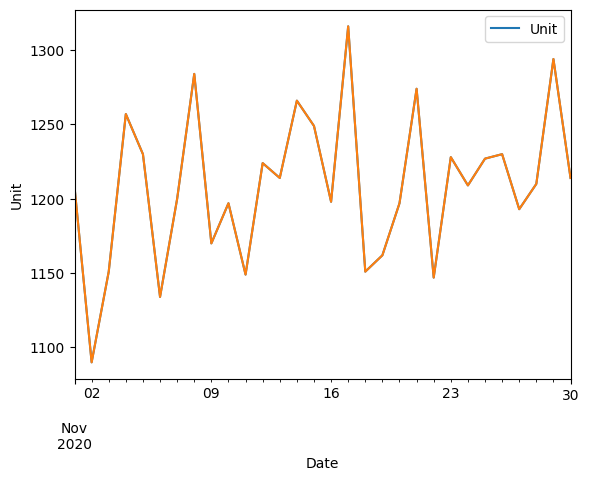

In [19]:
df_nov.plot.line(y='Unit')
df_nov.index
sns.lineplot(x = df_nov.index, y='Unit', data=df_nov)

<Axes: xlabel='Date', ylabel='Unit'>

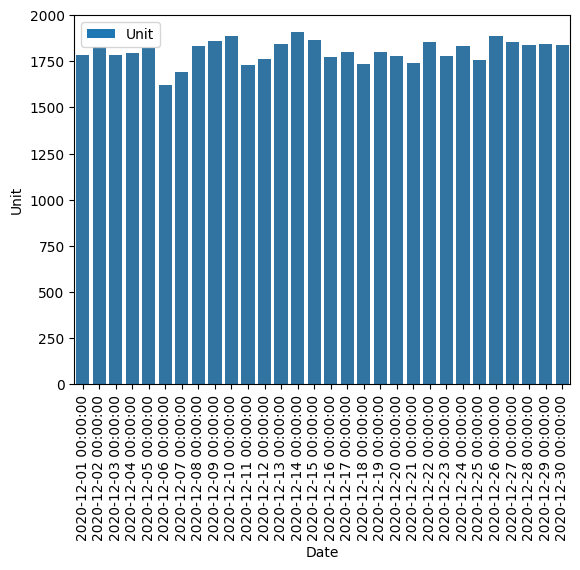

In [20]:
df_dec.plot.bar(y='Unit')
df_dec.index
sns.barplot(x = df_dec.index, y = 'Unit', data=df_dec)

### Weekly Data Analysis
Now, let's chunk this quarterly data into Weekly data and perform the analysis. For each of the Week.

In [21]:
print(df)

           Date        Time State     Group  Unit  Sales
0    2020-10-01     Morning    WA      Kids     8  20000
1    2020-10-01     Morning    WA       Men     8  20000
2    2020-10-01     Morning    WA     Women     4  10000
3    2020-10-01     Morning    WA   Seniors    15  37500
4    2020-10-01   Afternoon    WA      Kids     3   7500
...         ...         ...   ...       ...   ...    ...
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000
7556 2020-12-30     Evening   TAS      Kids    15  37500
7557 2020-12-30     Evening   TAS       Men    15  37500
7558 2020-12-30     Evening   TAS     Women    11  27500
7559 2020-12-30     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]


In [22]:
'''df["Week"] =df['Date'].apply(lambda date: datetime.date.isocalendar(date)[1])
df.drop('State',axis=1,inplace=True)
df.drop('Group',axis=1,inplace=True)
df.drop('Time',axis=1,inplace=True)
df.drop('Date',axis=1,inplace=True)
df.drop('Unit',axis=1,inplace=True)
df2=df.groupby(['Week']).mean()
df2.plot()
plt.show()

print(df2.head())'''

'df["Week"] =df[\'Date\'].apply(lambda date: datetime.date.isocalendar(date)[1])\ndf.drop(\'State\',axis=1,inplace=True)\ndf.drop(\'Group\',axis=1,inplace=True)\ndf.drop(\'Time\',axis=1,inplace=True)\ndf.drop(\'Date\',axis=1,inplace=True)\ndf.drop(\'Unit\',axis=1,inplace=True)\ndf2=df.groupby([\'Week\']).mean()\ndf2.plot()\nplt.show()\n\nprint(df2.head())'

## Describing Data

### Data Description
Describing the data will give you the very first level information on the data with the basic information on the data such as **count**, **mean**, **std** (standard deviation), **min**, **max** and the quartiles. You will use the ***describe()*** command on the dataframe to get it. All the values are for the entire three month period.

In [23]:
df.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


For individual three months, we can invole **describe()** on **df_oct**, **df_nov** and **df_dec**, as shown:

In [24]:
df_oct.describe()

,Unit,Sales
count,30.000000,3.000000e+01
mean,1523.866667,3.809667e+06
std,43.041867,1.076047e+05
min,1458.000000,3.645000e+06
25%,1487.250000,3.718125e+06
50%,1519.500000,3.798750e+06
75%,1554.500000,3.886250e+06
max,1602.000000,4.005000e+06


In [25]:
df_nov.describe()

,Unit,Sales
count,30.000000,3.000000e+01
mean,1209.100000,3.022750e+06
std,51.177413,1.279435e+05
min,1090.000000,2.725000e+06
25%,1175.750000,2.939375e+06
50%,1209.500000,3.023750e+06
75%,1230.000000,3.075000e+06
max,1316.000000,3.290000e+06


In [26]:
df_dec.describe()

,Unit,Sales
count,30.000000,3.000000e+01
mean,1804.400000,4.511000e+06
std,61.370329,1.534258e+05
min,1624.000000,4.060000e+06
25%,1775.750000,4.439375e+06
50%,1812.500000,4.531250e+06
75%,1842.750000,4.606875e+06
max,1906.000000,4.765000e+06


## Box Plot Analysis

#### Unit Analysis

[Text(0.5, 1.0, 'October Units')]

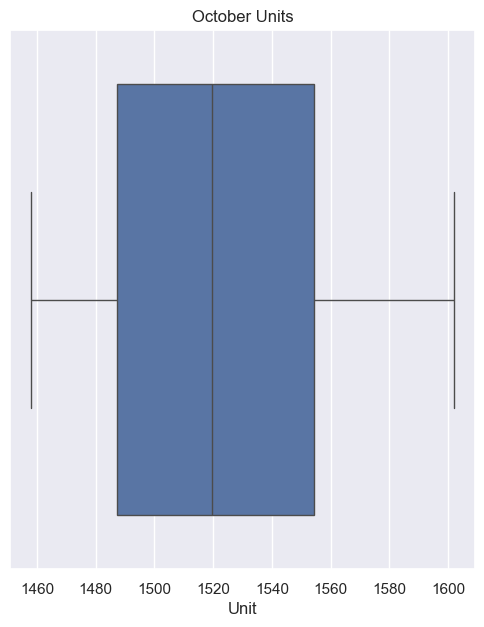

In [27]:
sns.set(rc={'figure.figsize':(6,7)})
bp_oct = sns.boxplot(x='Unit', data=df_oct)
bp_oct.set(title='October Units')

In the above boxplot, you can see the variation in the quartiles of the **Unit** values for the month of October, it is rather wide-spread with a mean value of "1523"

[Text(0.5, 1.0, 'November Units')]

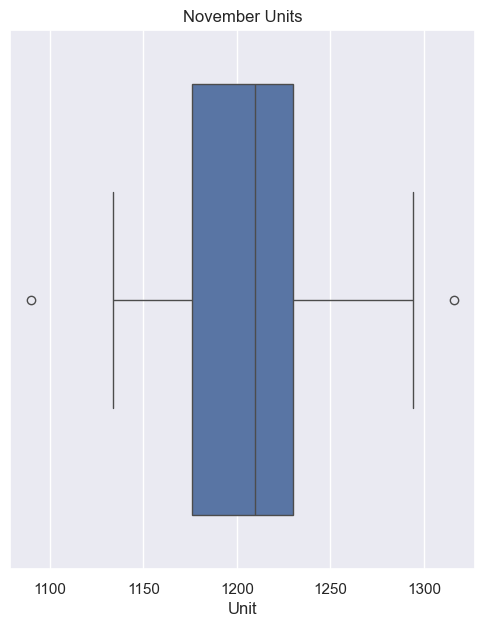

In [28]:
sns.set(rc={'figure.figsize':(6,7)})
bp_nov = sns.boxplot(x='Unit', data=df_nov)
bp_nov.set(title='November Units')

In the above boxplot, you can see the variation in the quartiles of the **Unit** values for the month of November, it is rather wide-spread with a mean value of "1209"

[Text(0.5, 1.0, 'December Units')]

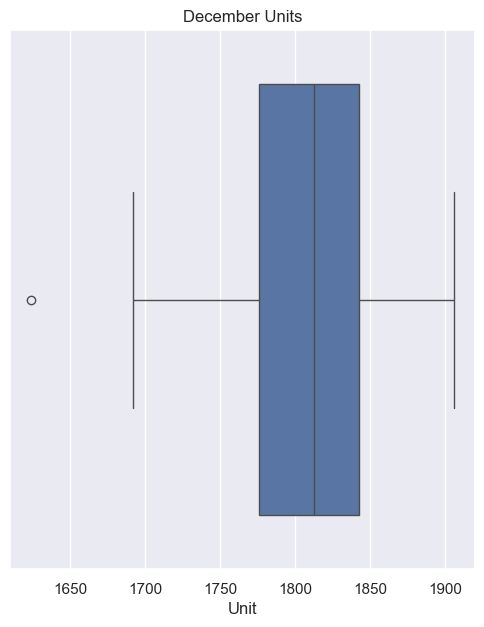

In [29]:
sns.set(rc={'figure.figsize':(6,7)})
bp_dec = sns.boxplot(x='Unit', data=df_dec)
bp_dec.set(title='December Units')

In the above boxplot, you can see the variation in the quartiles of the **Unit** values for the month of November, it is rather wide-spread with a mean value of "1804". 


#### Sales Analysis

[Text(0.5, 1.0, 'October Sales')]

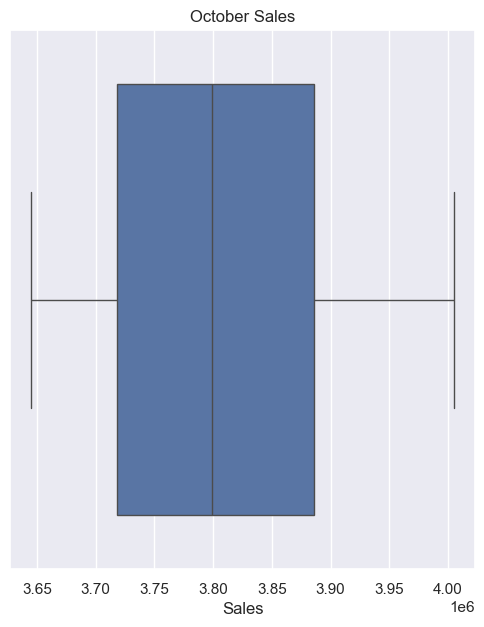

In [30]:
sns.set(rc={'figure.figsize':(6,7)})
bp_oct = sns.boxplot(x='Sales', data=df_oct)
bp_oct.set(title='October Sales')

In the above boxplot, you can see the variation in the quartiles of the **Sales** values for the month of October, it is rather wide-spread with a mean value of "3.809667e+06"

[Text(0.5, 1.0, 'November Sales')]

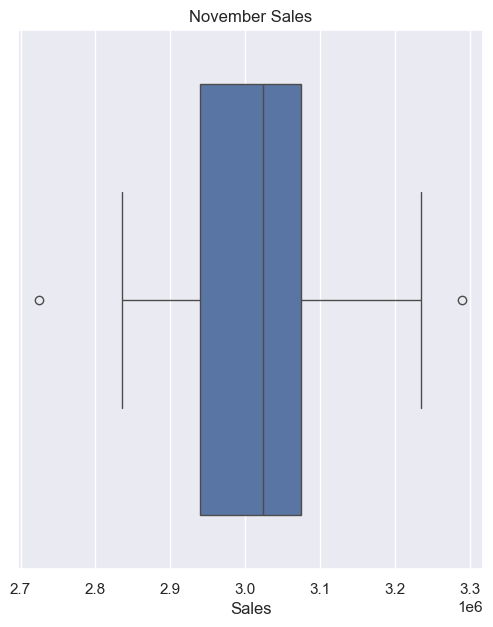

In [31]:
sns.set(rc={'figure.figsize':(6,7)})
bp_oct = sns.boxplot(x='Sales', data=df_nov)
bp_oct.set(title='November Sales')

In the above boxplot, you can see the variation in the quartiles of the **Sales** values for the month of November, it is rather wide-spread with a mean value of "3.022750e+06"

[Text(0.5, 1.0, 'December Sales')]

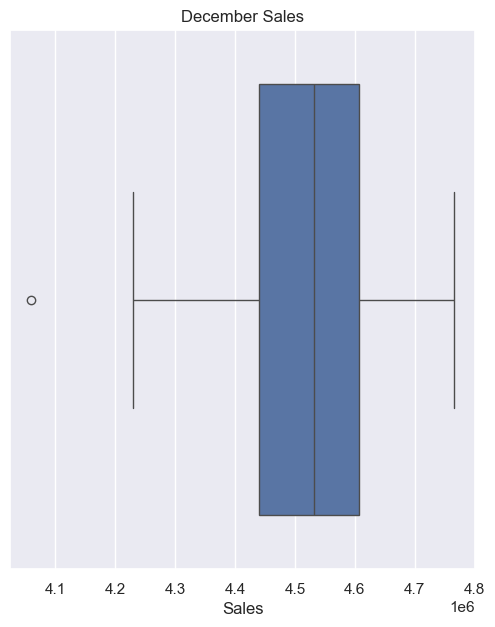

In [32]:
sns.set(rc={'figure.figsize':(6,7)})
bp_oct = sns.boxplot(x='Sales', data=df_dec)
bp_oct.set(title='December Sales')

In the above boxplot, you can see the variation in the quartiles of the **Sales** values for the month of December, it is rather wide-spread with a mean value of "4.511000e+06"

***Note : These above Values are consolidated or aggregated across multiple categorical variables: State, Group, and Time.***

### Monthly Plots and Analysis
In the above section, we separated the data monthly wise and performed the top-level description to get the main statistics of the sales. In this section, we will plot, month-wise and do a comparative study on the numbers.

### ***Overall Unit and Sales figures***

In [33]:
oct_days = df_oct.index.day
oct_days.astype('str')
nov_days = df_nov.index.day
nov_days.astype('str')
dec_days = df_dec.index.day
dec_days.astype('str')

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30'],
      dtype='object', name='Date')

#### Units sold in October, November and December

C:\Users\aman7\AppData\Local\Temp\ipykernel_18952\1103189367.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  o = bp_oct.set_xticklabels(oct_days)


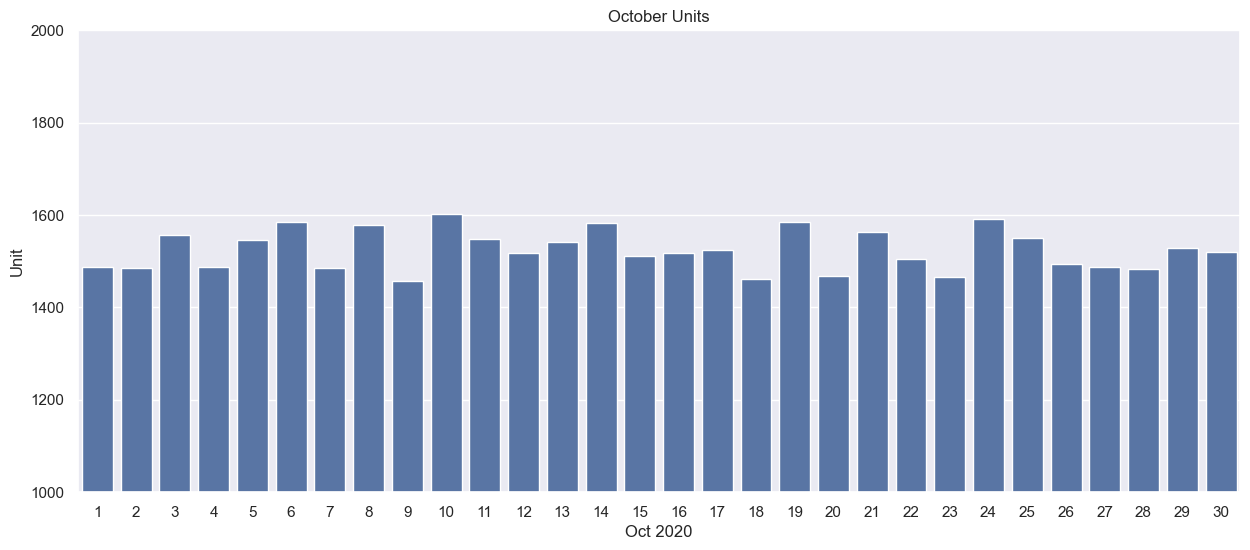

In [34]:
sns.set(rc={'figure.figsize':(15,6)})
bp_oct = sns.barplot(x = df_oct.index, y='Unit', data=df_oct)
#bp_dec = sns.barplot(x = df_dec.index, y='Unit', data=df_dec)
bp_oct.set(xlabel='Oct 2020', title='October Units')
#bp_dec.set(xlabel='Dev 2020', title='December Units')
bp_oct.set(ylim=(1000, 2000))
o = bp_oct.set_xticklabels(oct_days)

C:\Users\aman7\AppData\Local\Temp\ipykernel_18952\1250450042.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  n = bp_nov.set_xticklabels(nov_days)


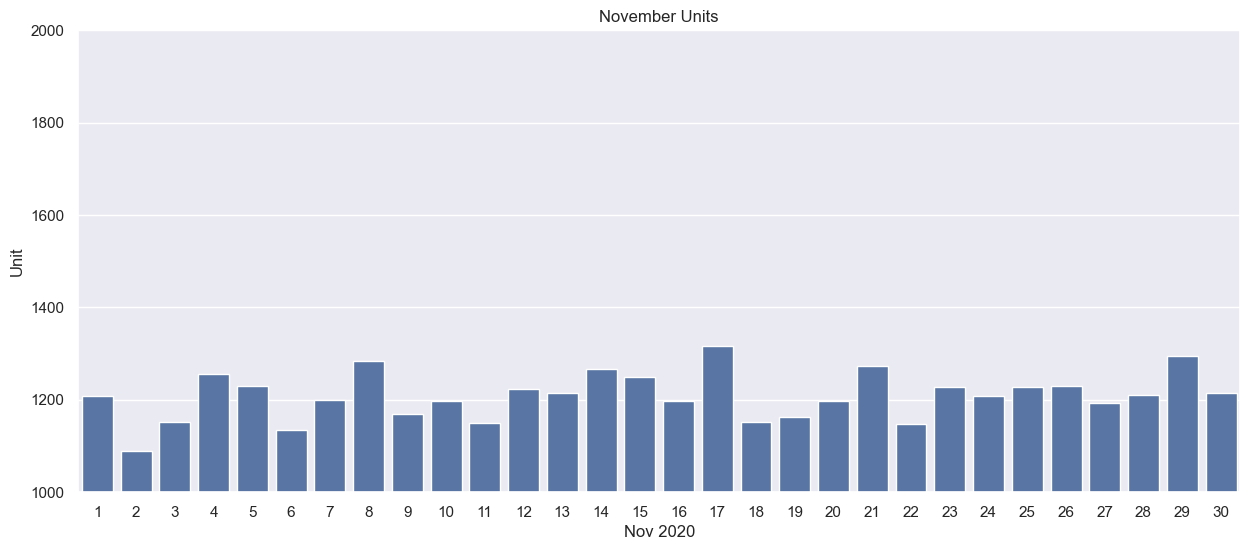

In [35]:
sns.set(rc={'figure.figsize':(15,6)})
bp_nov = sns.barplot(x = df_nov.index, y='Unit', data=df_nov)
bp_nov.set(xlabel='Nov 2020', title='November Units')
bp_nov.set(ylim=(1000, 2000))
n = bp_nov.set_xticklabels(nov_days)

C:\Users\aman7\AppData\Local\Temp\ipykernel_18952\720711747.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = bp_dec.set_xticklabels(dec_days)


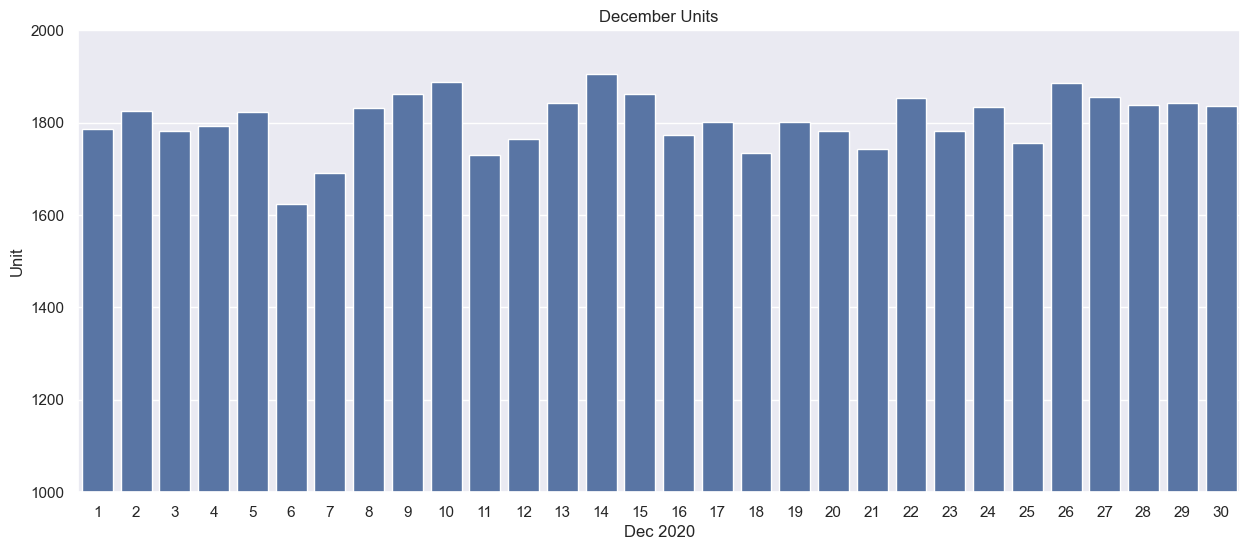

In [36]:
sns.set(rc={'figure.figsize':(15,6)})
bp_dec = sns.barplot(x = df_dec.index, y='Unit', data=df_dec)
bp_dec.set(xlabel='Dec 2020', title='December Units')
bp_dec.set(ylim=(1000, 2000))
d = bp_dec.set_xticklabels(dec_days)

As you can see, the above plots shows a mean value of 1523 units for the month of October, 1209 for the month of November and 1804 for the month of December. As you can see these numbers are endorsed by the describe() command previously. Accordingly, November month was leaner in Unit sales, than October and December of 2020.

#### Sales numbers for October, November and December

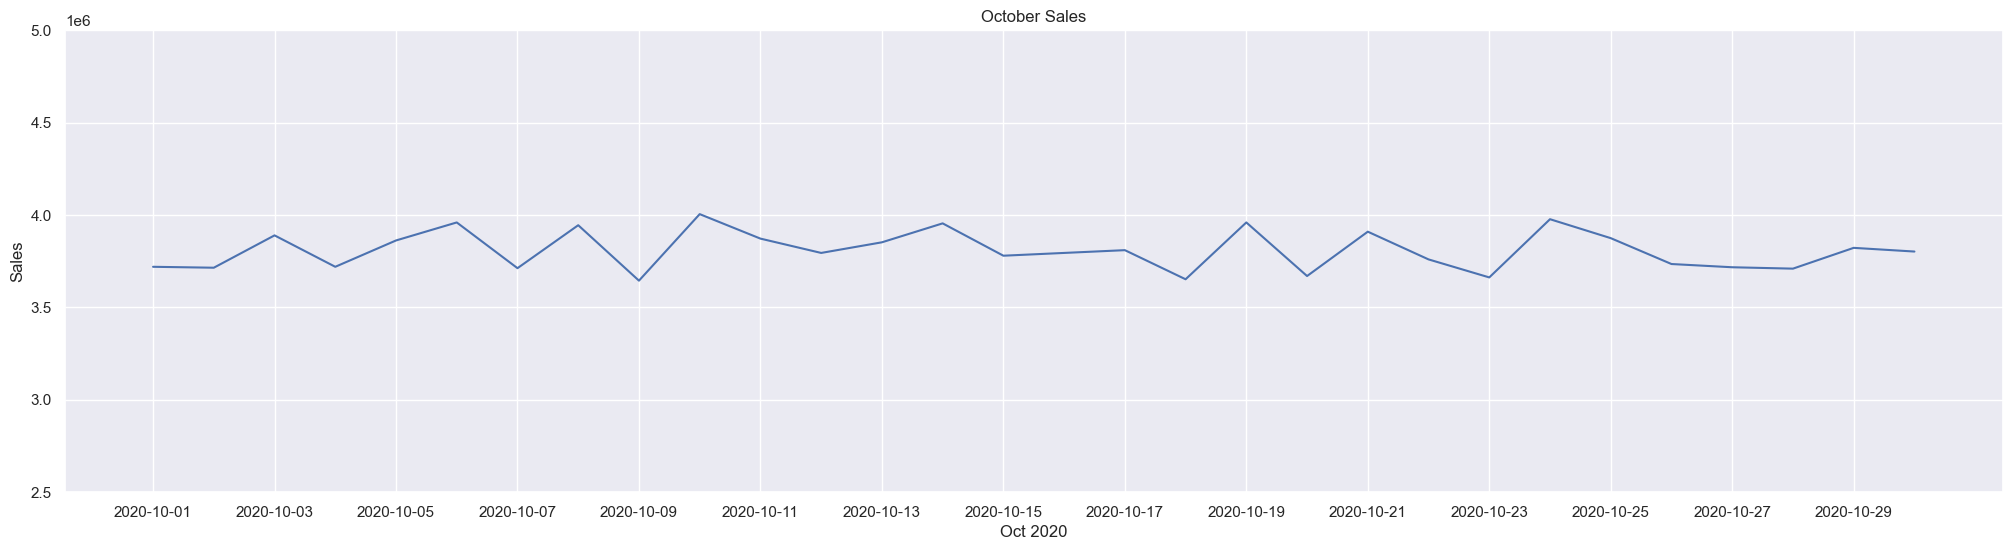

In [37]:
import matplotlib
sns.set(rc={'figure.figsize':(25,6)})
lp_oct = sns.lineplot(x = df_oct.index, y = 'Sales', data=df_oct)
loc = matplotlib.dates.DayLocator(bymonthday=range(1, 30,2))
lp_oct.set(ylim=(2.5e6, 5.0e6))
lp_oct.set(xlabel='Oct 2020', title='October Sales')
lp_oct.xaxis.set_major_locator(loc)

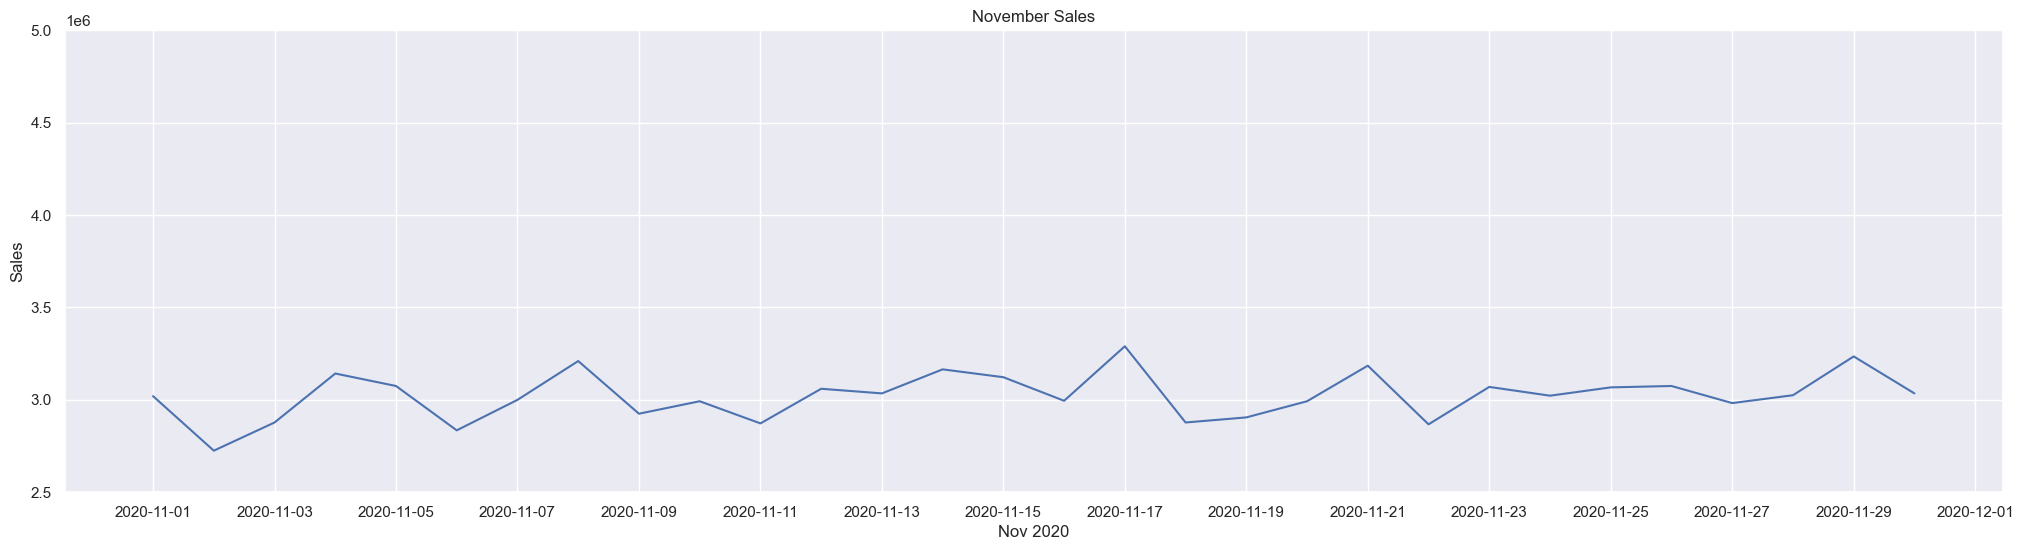

In [38]:
sns.set(rc={'figure.figsize':(25,6)})
lp_nov = sns.lineplot(x = df_nov.index, y = 'Sales', data=df_nov)
loc = matplotlib.dates.DayLocator(bymonthday=range(1, 30,2))
lp_nov.set(ylim=(2.5e6, 5.0e6))
lp_nov.set(xlabel='Nov 2020', title='November Sales')
lp_nov.xaxis.set_major_locator(loc)

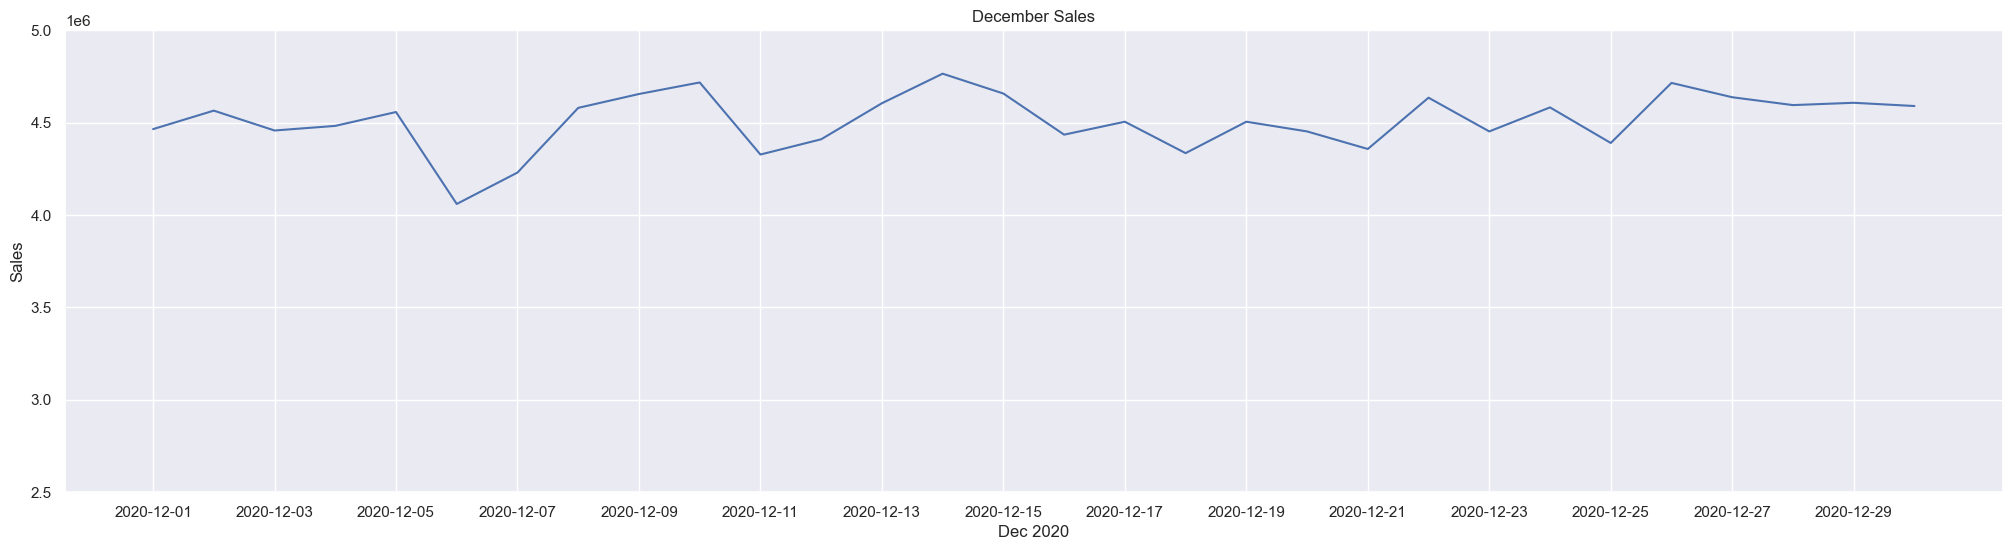

In [39]:
sns.set(rc={'figure.figsize':(25,6)})
lp_dec = sns.lineplot(x = df_dec.index, y = 'Sales', data=df_dec)
loc = matplotlib.dates.DayLocator(bymonthday=range(1, 30,2))
lp_dec.set(ylim=(2.5e6, 5.0e6))
lp_dec.set(xlabel='Dec 2020', title='December Sales')
lp_dec.xaxis.set_major_locator(loc)

In the above plots, we are using lineplot for seaborn, and the sales figures are plotted for each month. Also, you can see, the y axis is same for all the plots, and based on the available numbers, December was most productive in terms of the monthly sales.

## Consolidated 3 month Sales plot

<Axes: xlabel='Date', ylabel='Sales'>

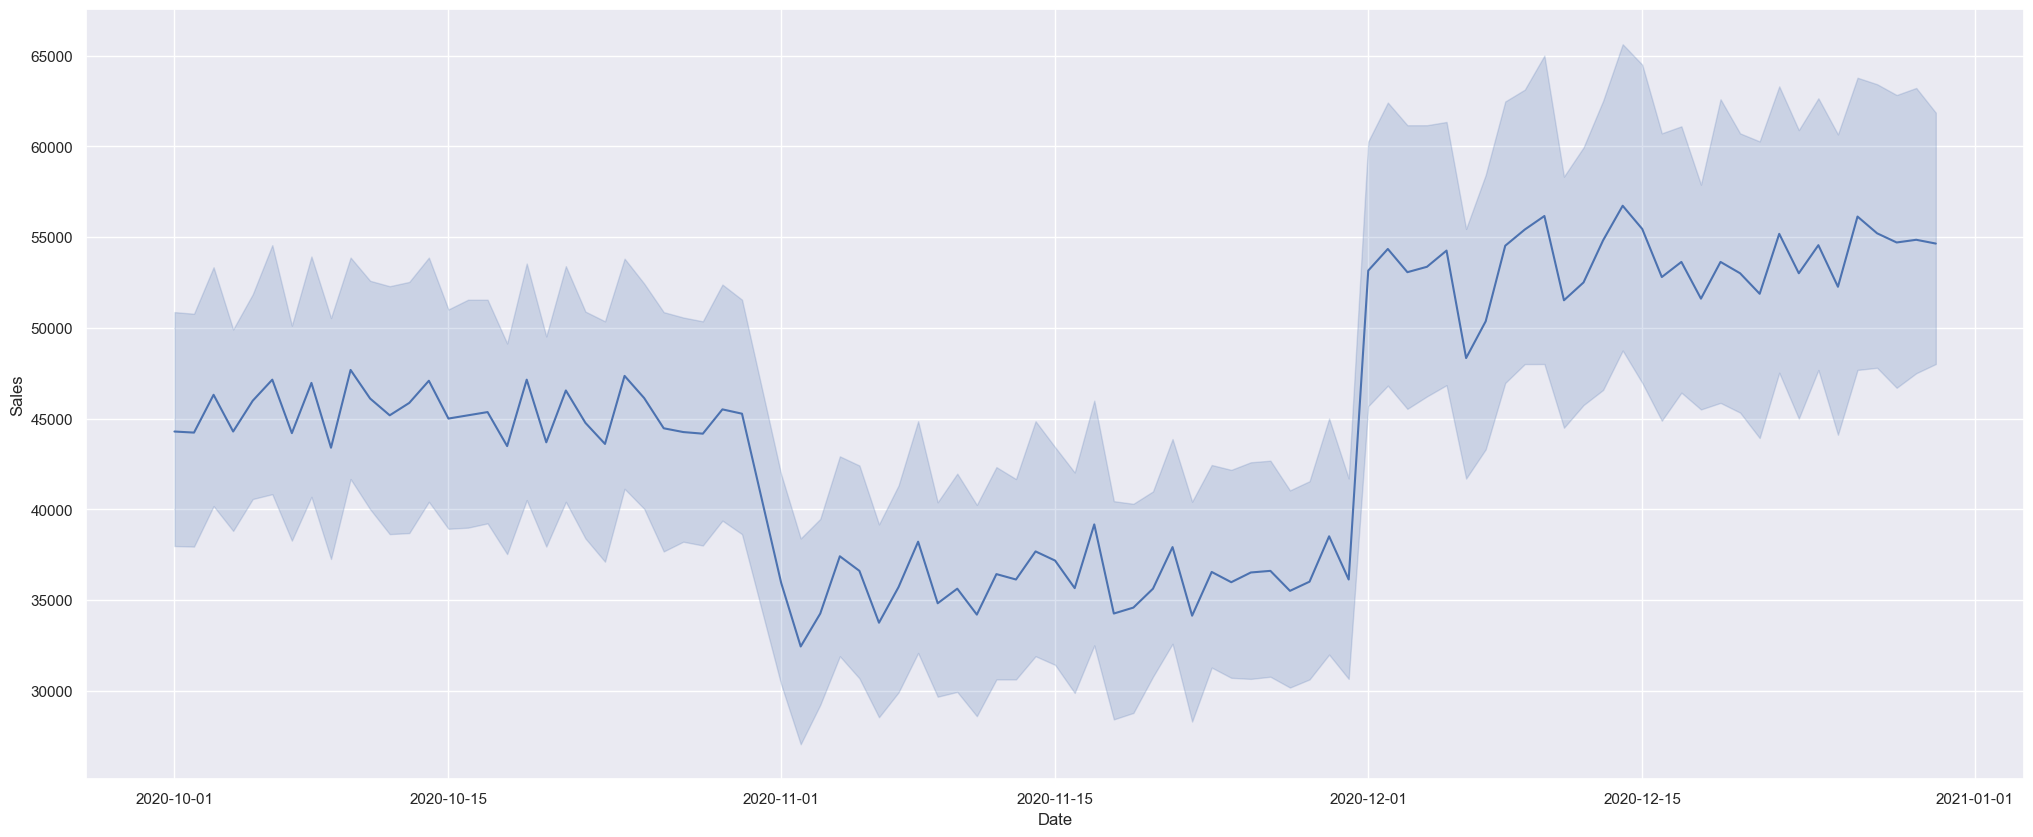

In [40]:
sns.set(rc={'figure.figsize':(25,10)})
sns.lineplot(x = 'Date', y = 'Sales', data = df)

In the above typical Sales figures, using the lineplot of seaborn. Notice that we are using the original dataframe object **df**, and this has all the three months of data, as against the previous three, where the three sub-dataframes are separated by **groupby()** feature of pandas. One more point to be noted here. This plot is different from the plot above, and this is evident from the values of y-axis. The difference here is that the above figures are consolidated data for each month, including the **Group** and **Time** data, which are categorical in nature.

One more aspect of this is that this line plot is inclusive of stastical estimation and errors bars that are superimposed on the line plot. This is the special feature of seaborn. This is provided eventhough it is not asked for.

## Comprehensive Snapshot
The following are the complete month-wise snapshots that shows monthly Units sales on the top-row, and monthly Sales in the bottom. The sub-plot feature is used to get a complets comprehensive shanshot for the three months.

C:\Users\aman7\AppData\Local\Temp\ipykernel_18952\3948363893.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  o = bp_oct.set_xticklabels(oct_days)
C:\Users\aman7\AppData\Local\Temp\ipykernel_18952\3948363893.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  n = bp_nov.set_xticklabels(nov_days)
C:\Users\aman7\AppData\Local\Temp\ipykernel_18952\3948363893.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = bp_dec.set_xticklabels(dec_days)


[(2500000.0, 5000000.0)]

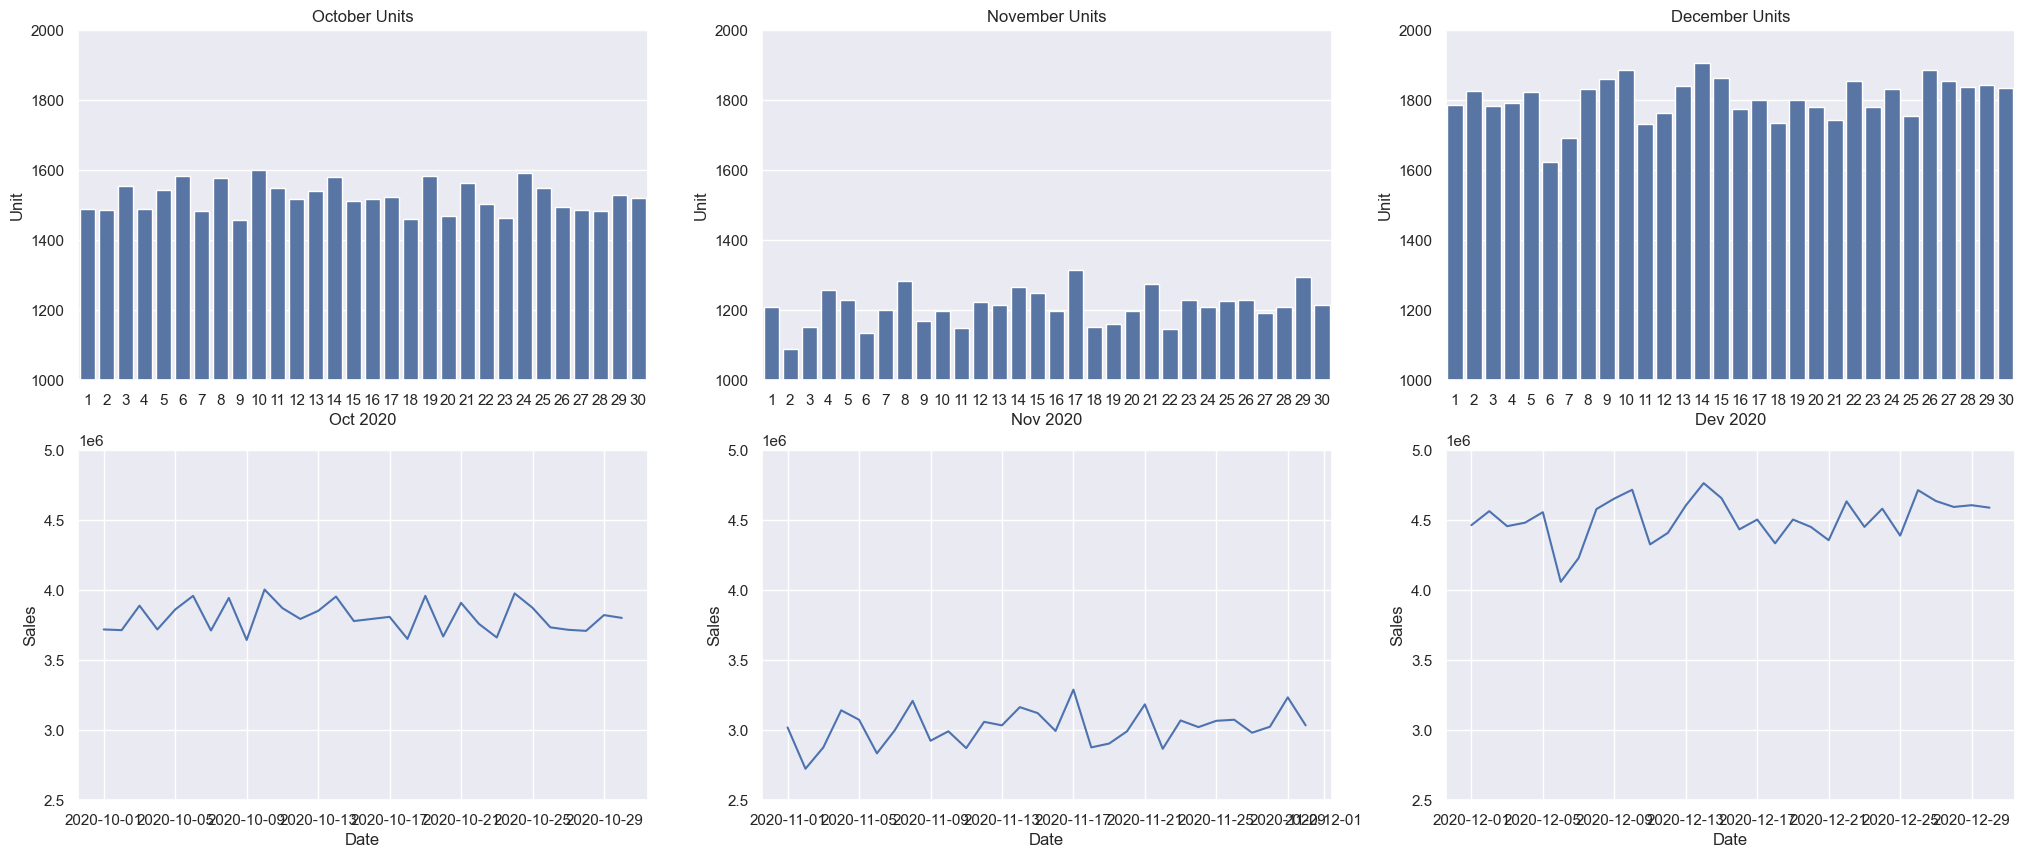

In [41]:
fig, axes = plt.subplots(2, 3)

bp_oct = sns.barplot(x = df_oct.index, y='Unit', data=df_oct, ax=axes[0,0])
bp_nov = sns.barplot(x = df_nov.index, y='Unit', data=df_nov, ax=axes[0,1])
bp_dec = sns.barplot(x = df_dec.index, y='Unit', data=df_dec, ax=axes[0,2])

bp_oct.set(xlabel='Oct 2020', title='October Units')
bp_nov.set(xlabel='Nov 2020', title='November Units')
bp_dec.set(xlabel='Dev 2020', title='December Units')

bp_oct.set(ylim=(1000, 2000))
bp_nov.set(ylim=(1000, 2000))
bp_dec.set(ylim=(1000, 2000))

o = bp_oct.set_xticklabels(oct_days)
n = bp_nov.set_xticklabels(nov_days)
d = bp_dec.set_xticklabels(dec_days)

lp_oct = sns.lineplot(x = df_oct.index, y='Sales', data=df_oct, ax=axes[1,0])
lp_nov = sns.lineplot(x = df_nov.index, y='Sales', data=df_nov, ax=axes[1,1])
lp_dec = sns.lineplot(x = df_dec.index, y='Sales', data=df_dec, ax=axes[1,2])

lp_oct.set(ylim=(2.5e6, 5.0e6))
lp_nov.set(ylim=(2.5e6, 5.0e6))
lp_dec.set(ylim=(2.5e6, 5.0e6))

## Analysis of Statewise sales in Australia

In the next, we are going to perform the analysis based on the categorical data of the problem. There are three main categories - **State**, **Group** and **Time**. In the first, we are going to pivot our main dataframe ```df``` indexed on **State**, and also we are providing 2 ```aggfunc```tions for computing - ```sum``` and ```mean```. The reporting will be state-wise, and we are calling it as ```state_pivot```. As you can see from the output, both ```sum``` and ```mean``` for ***Unit*** and ***Sales*** are reported.

In [42]:
state_pivot = df.pivot_table(index='State', values=['Unit', 'Sales'], aggfunc=['sum', 'mean'])

state_pivot


sum                 mean           
           Sales   Unit         Sales       Unit
State                                           
 NSW    74970000  29988  69416.666667  27.766667
 NT     22580000   9032  20907.407407   8.362963
 QLD    33417500  13367  30942.129630  12.376852
 SA     58857500  23543  54497.685185  21.799074
 TAS    22760000   9104  21074.074074   8.429630
 VIC   105565000  42226  97745.370370  39.098148
 WA     22152500   8861  20511.574074   8.204630

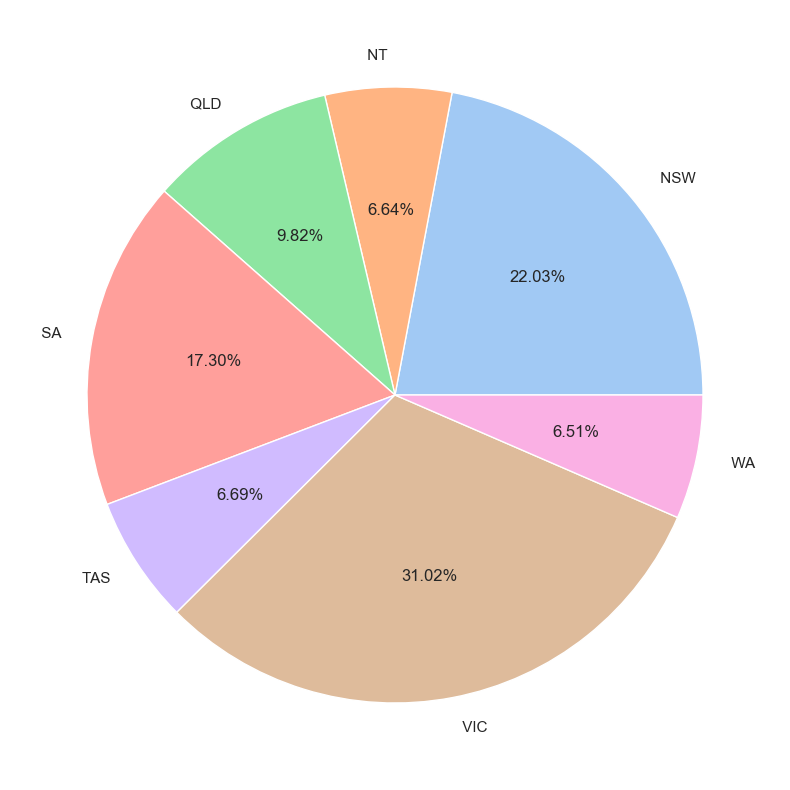

In [43]:
labels = state_pivot['mean']['Sales'].index.to_list()
# print(labels)
colors = sns.color_palette('pastel')[0:7]
plt.pie(state_pivot['mean']['Sales'], labels=labels, colors=colors, autopct='%.2f%%')
plt.show()

From the above pie chart, we understand that more than 70% of the business come from the three states VIC(31.02%), NSW(22.03%) and SA(17.30%). Remaining states contribute just about 30%. This is based on the mean **Sales** data.

### Groupwise Analysis

Now, we are going to perform the analysis based on the next categorical data of the problem - **Group**.  Here, we are going to pivot our main dataframe ```df``` indexed on **Group**, and also we are providing the same two ```aggfunc```tions for computing - ```sum``` and ```mean```. The reporting will be state-wise, and we are calling it as ```group_pivot```. As you can see from the output, both ```sum``` and ```mean``` for ***Unit*** and ***Sales*** are reported.

In [44]:
group_pivot = df.pivot_table(index='Group',values=['Unit','Sales'], aggfunc=['sum', 'mean'])

group_pivot

sum                 mean           
             Sales   Unit         Sales       Unit
Group                                             
 Kids     85072500  34029  45011.904762  18.004762
 Men      85750000  34300  45370.370370  18.148148
 Seniors  84037500  33615  44464.285714  17.785714
 Women    85442500  34177  45207.671958  18.083069

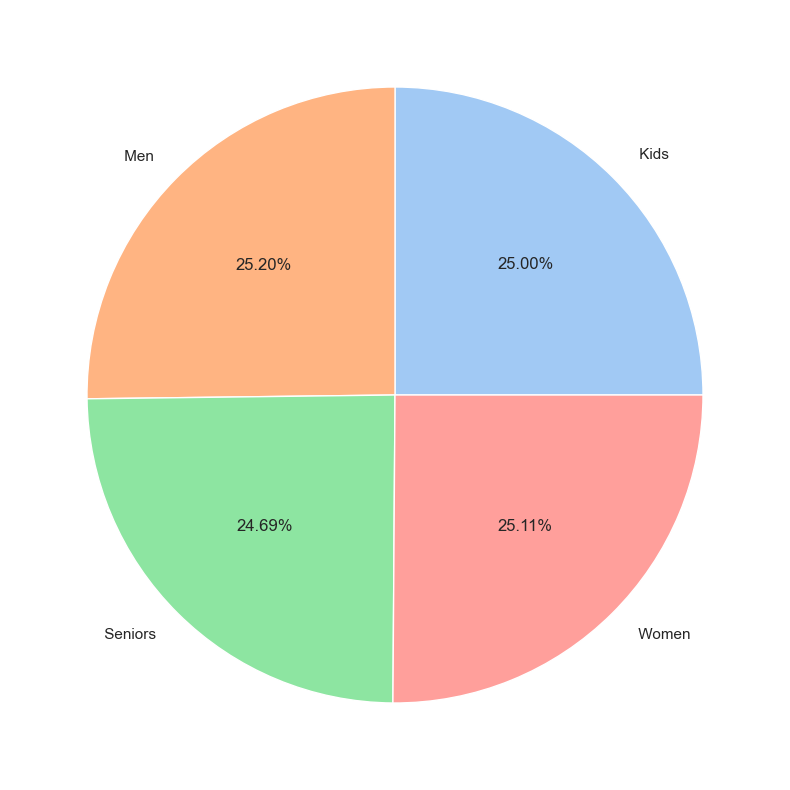

In [45]:
labels = group_pivot['mean']['Sales'].index.to_list()
# print(labels)
colors = sns.color_palette('pastel')[0:5]
plt.pie(group_pivot['mean']['Sales'], labels=labels, colors=colors, autopct='%.2f%%')
plt.show()

The group-wise distribution shows an interesting picture. **Men**(25.20%), **Women**(25.11%), **Kids**(25.00%) and **Seniors**(24.69%) have almost equal share, in terms of the value of sales for the entire three-month period.

### Timewise Analysis

In the next, we are going to perform the analysis based on the next categorical data of the problem - **Time**.  Here, we are going to pivot our main dataframe ```df``` indexed on **Time**, and also we are providing the same two ```aggfunctions``` for computing - ```sum``` and ```mean```. The reporting will be state-wise, and we are calling it as ```time_pivot```. As you can see from the output, both ```sum``` and ```mean``` for **Unit** and **Sales** are reported.

In [46]:
time_pivot = df.pivot_table(index='Time',values=['Unit','Sales'], aggfunc=['sum', 'mean'])

time_pivot

sum                 mean           
                Sales   Unit         Sales       Unit
Time                                                 
 Afternoon  114007500  45603  45241.071429  18.096429
 Evening    112087500  44835  44479.166667  17.791667
 Morning    114207500  45683  45320.436508  18.128175

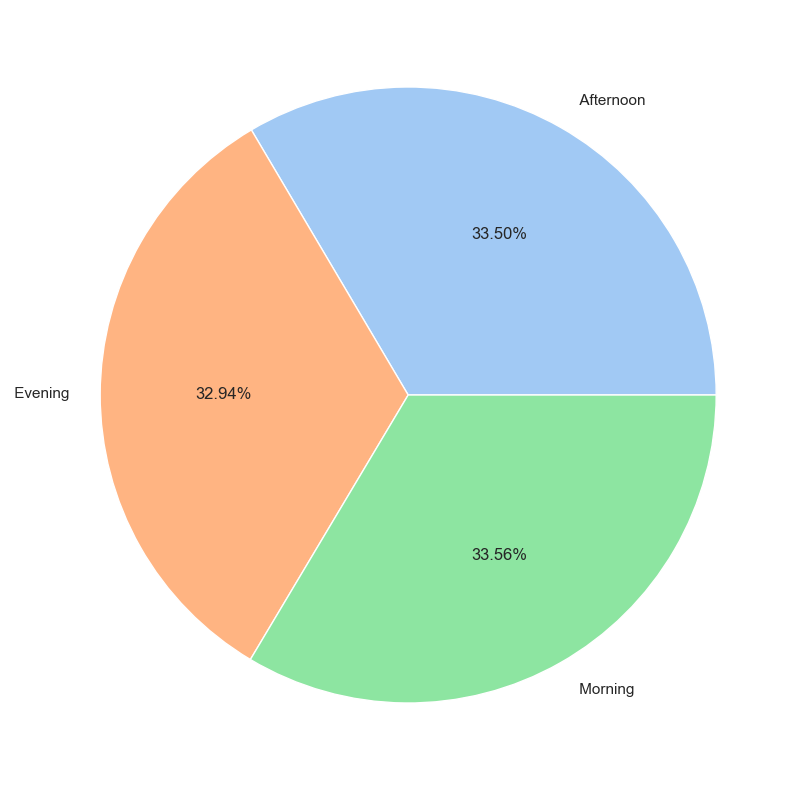

In [47]:
labels = time_pivot['mean']['Sales'].index.to_list()
# print(labels)
colors = sns.color_palette('pastel')[0:5]
plt.pie(time_pivot['mean']['Sales'], labels=labels, colors=colors, autopct='%.2f%%')
plt.show()

The time of sale doesn't matter for the company because, almost equally distributed in terms of **Morning**(33.56%), **Afternoon**(33.50%) or **Evening**(32.94%) for Sales.

# ***Report***

***Time Period:*** The analysis is based on three months of data - October, November, and December 2020. It’s important to note that the data for October 31, 2020, is missing and has been excluded from the analysis.

***Monthly Performance:*** The business saw subdued activity in November, with both Units and Sales experiencing a downturn. However, December witnessed a significant rebound with performance approximately 1.5 times that of November.

***State-wise Analysis:*** The sales were majorly contributed by three states - VIC, NSW, and SA, which together accounted for about 70% of the overall three-month sales. The remaining states contributed around 30% to the overall sales. Among all, VIC emerged as the top-performing state, while WA, NT, and TAS lagged behind with a contribution of just 7% each.

***Age Group Analysis:*** The apparels were equally popular among all age groups - kids, men, women, or seniors, indicating a broad appeal of the products.

***Business Hours:*** There was no specific time that was bad for business. The store was equally busy during all its operating hours.

***This analysis provides valuable insights into the sales performance of the business over the given period. It can help in making informed decisions for future business strategies, such as focusing more on the high-performing states and times, and devising targeted marketing strategies for different age groups.***

***Sales analysis is a process that assesses, analyzes, and monitors a business’s sales efforts. It may include capturing, filtering, and analyzing sales data to evaluate past sales performance and predict future sales figures. Sales analysis aids in making strategic business decisions and developing effective sales tactics and strategies.***

***Sales analytics refers to the use of technology to collect and use sales data to derive actionable insights. It is used to identify, optimize, and forecast sales. It uses different metrics and KPIs to plan an efficient sales model that generates higher revenue for the business***

It provides valuable insights into the sales performance of the business over the three months - October, November, and December 2020. Here are the important insights from my analysis:

***Monthly Performance:*** November saw subdued activity with both Units and Sales experiencing a downturn. However, December witnessed a significant rebound with performance approximately 1.5 times that of November.

***State-wise Analysis:*** The majority of the sales (around 70%) were contributed by just three states - VIC, NSW, and SA. The remaining states contributed around 30% to the overall sales. VIC emerged as the top-performing state, while WA, NT, and TAS lagged behind with a contribution of just 7% each.

***Popularity Among Different Age Groups:*** The apparels were equally popular among all age groups - kids, men, women, or seniors, indicating a broad appeal of the products.
***Business Hours:*** There was no specific time that was bad for business. The store was equally busy during all its operating hours.

***This analysis can help in making informed decisions for future business strategies, such as focusing more on the high-performing states and times, and devising targeted marketing strategies for different age groups.***